# Collaborative Filtering
- **Recommending Similar Movie to the User**

### Problem Definition

Sarah a friend of yours just watched a movie called **Return of the Jedi**. Predict movies similar to Return of Jedi using a Recommender System written in Python.

### importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
mv = pd.read_csv(r"C:\Users\Shivani Dussa\Downloads\movie_data.csv")
mv.shape

(100000, 5)

In [4]:
mv.head()

,User_ID,Movie_ID,Ratings,Timestamp,Title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [5]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   User_ID    100000 non-null  int64 
 1   Movie_ID   100000 non-null  int64 
 2   Ratings    100000 non-null  int64 
 3   Timestamp  100000 non-null  int64 
 4   Title      100000 non-null  object
dtypes: int64(4), object(1)
memory usage: 3.8+ MB


In [6]:
mv.duplicated().sum()

0

In [12]:
print(len(mv.Movie_ID.unique()))
print(len(mv.Ratings.unique()))
print(len(mv.User_ID.unique()))

1682
5
943


**Understanding Recommender System in Python**

A Recommender System is a simple algorithm which predicts what a user may or may not like among a given list of items. The algorithm rates the items and presents the user the items that they would like. An example of a recommendation system in action is when you vist Netflix, it recommends movies to you. The kind of recommendation system that they use is very complex. We are going to implement a very simple recommender system in Python by just using Pandas.

## Implementing Recommender System in Python

In [3]:
# count the ratings of the movies
d = mv.groupby('Title')['Ratings'].count().sort_values(ascending = False)
d

Title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: Ratings, Length: 1664, dtype: int64

In [27]:
d.shape

(1664,)

In [4]:
ratings = pd.DataFrame(mv.groupby('Title')['Ratings'].mean())
ratings.head()

,Ratings
Title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [11]:
#Creating a dataframe with mean 'rating' and total number of ratings for each movie
ratings['Number of Ratings'] = pd.DataFrame(mv.groupby('Title')['Ratings'].count())
#ratings['Number of Ratings']
ratings.sort_values('Number of Ratings',ascending = False,inplace = True)
ratings.head()

,Ratings,Number of Ratings
Title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


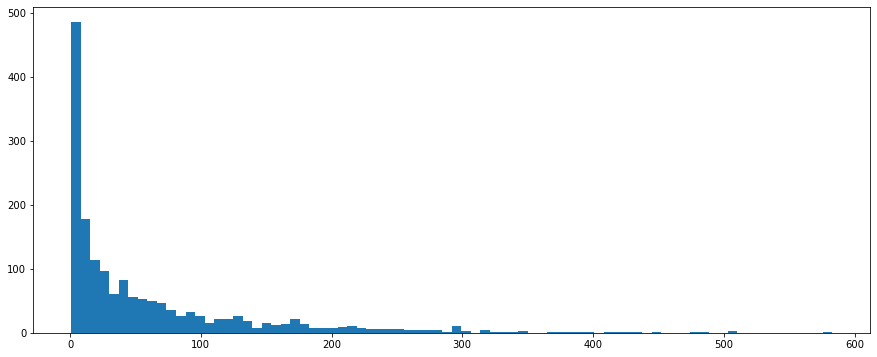

In [6]:
# visualizing the number of rating columns
plt.figure(figsize = (15,6))
plt.hist(ratings['Number of Ratings'],bins = 80)
plt.show()

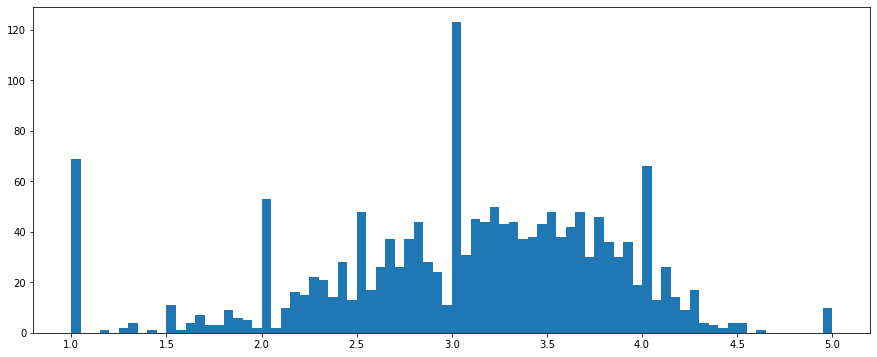

In [10]:
# visualize the ratings
plt.figure(figsize = (15,6))
plt.hist(ratings['Ratings'],bins = 80)
plt.show()

In [12]:
#sorting values according to the 'num of rating column'
pivot_movie = mv.pivot_table(index = 'User_ID',columns = 'Title',values = 'Ratings')
print(pivot_movie.shape)
pivot_movie.head()

(943, 1664)


Title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User_ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [24]:
# Analysing the correlation with similar movies
jedi_user_rating = pivot_movie['Return of the Jedi (1983)']
fargo_user_rating = pivot_movie['Fargo (1996)']

print(jedi_user_rating.head())
fargo_user_rating.head()

User_ID
1    5.0
2    NaN
3    4.0
4    NaN
5    5.0
Name: Return of the Jedi (1983), dtype: float64


User_ID
1    5.0
2    5.0
3    NaN
4    NaN
5    5.0
Name: Fargo (1996), dtype: float64

In [25]:
similar_return_of_jedi = pivot_movie.corrwith(jedi_user_rating) #' corrwith' is computes the correlation btwn rows & columns of 
similar_return_of_jedi.head()                                                                # two datasets

Title
'Til There Was You (1997)    1.000000
1-900 (1994)                -0.828079
101 Dalmatians (1996)        0.165659
12 Angry Men (1957)         -0.026169
187 (1997)                   0.064155
dtype: float64

In [26]:
similar_return_of_jedi.shape

(1664,)

In [29]:
corr_return_of_jedi = pd.DataFrame(similar_return_of_jedi,columns = ['correlation'])
corr_return_of_jedi.dropna(inplace = True)
corr_return_of_jedi.head()

,correlation
Title,
'Til There Was You (1997),1.000000
1-900 (1994),-0.828079
101 Dalmatians (1996),0.165659
12 Angry Men (1957),-0.026169
187 (1997),0.064155


In [30]:
corr_return_of_jedi = corr_return_of_jedi.join(ratings['Number of Ratings'])
corr_return_of_jedi.head()

,correlation,Number of Ratings
Title,,
'Til There Was You (1997),1.000000,9
1-900 (1994),-0.828079,5
101 Dalmatians (1996),0.165659,109
12 Angry Men (1957),-0.026169,125
187 (1997),0.064155,41


In [32]:
# similar movies like Return of jedi
corr_return_of_jedi[corr_return_of_jedi['Number of Ratings'] > 200].sort_values('correlation',ascending = False).head(10)

,correlation,Number of Ratings
Title,,
Return of the Jedi (1983),1.000000,507
"Empire Strikes Back, The (1980)",0.721229,367
Star Wars (1977),0.672556,583
Raiders of the Lost Ark (1981),0.467391,420
Indiana Jones and the Last Crusade (1989),0.422294,331
Back to the Future (1985),0.411901,350
True Lies (1994),0.364536,208
Braveheart (1995),0.350180,297
Men in Black (1997),0.313007,303


- **From Above you can see top 10 movies are similar to the 'return of the Jedi' that can be Recommended to the user**

In [33]:
#similar movies for frago
similar_to_fargo = pivot_movie.corrwith(fargo_user_rating)
corr_fargo = pd.DataFrame(similar_to_fargo,columns = ['correlation'])
corr_fargo.head()

,correlation
Title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


In [34]:
corr_fargo.dropna(inplace = True)
corr_fargo = corr_fargo.join(ratings['Number of Ratings'])
corr_fargo.head()

,correlation,Number of Ratings
Title,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41


In [36]:
corr_fargo[corr_fargo['Number of Ratings'] > 200].sort_values('correlation',ascending = False).head(10)

,correlation,Number of Ratings
Title,,
Fargo (1996),1.000000,508
"People vs. Larry Flynt, The (1996)",0.341784,215
Stand by Me (1986),0.332730,227
Amadeus (1984),0.308669,276
2001: A Space Odyssey (1968),0.299882,259
"Graduate, The (1967)",0.295198,239
Raising Arizona (1987),0.293711,256
"Clockwork Orange, A (1971)",0.279690,221
One Flew Over the Cuckoo's Nest (1975),0.259840,264


**From above, you can see top 10 movies similar to the movie 'Fargo' that can be recommended to the user.**